In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=FutureWarning)

# Dataset

In [3]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Data science project\SCMS_Delivery_History_Dataset.csv')

# Basic informations of the Dataset

In [4]:
data.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [5]:
len(data)

7879

In [6]:
data.shape

(7879, 32)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  7879 non-null   object 
 1   PQ #                          7879 non-null   object 
 2   PO / SO #                     7879 non-null   object 
 3   ASN/DN #                      7879 non-null   object 
 4   Country                       7879 non-null   object 
 5   Managed By                    7879 non-null   object 
 6   Fulfill Via                   7879 non-null   object 
 7   Vendor INCO Term              7879 non-null   object 
 8   Shipment Mode                 7619 non-null   object 
 9   PQ First Sent to Client Date  7879 non-null   object 
 10  PO Sent to Vendor Date        7879 non-null   object 
 11  Scheduled Delivery Date       7879 non-null   object 
 12  Delivered to Client Date      7879 non-null   object 
 13  Del

In [8]:
data.describe()

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
count                 7879.000000         7879.000000     7.879000e+03   
mean                    78.667724        18256.725473     1.638220e+05   
std                     78.461791        40538.123065     3.504587e+05   
min                      1.000000            1.000000     0.000000e+00   
25%                     30.000000          390.000000     4.897060e+03   
50%                     60.000000         3000.000000     3.525000e+04   
75%                    100.000000        16959.000000     1.823794e+05   
max                   1000.000000       619999.000000     5.951990e+06   

        Pack Price   Unit Price  Line Item Insurance (USD)  
count  7879.000000  7879.000000                7664.000000  
mean     25.120069     0.719296                 252.747951  
std      50.993077     3.730360                 517.804739  
min       0.000000     0.000000                   0.000000  
25%       4.700000     0.100000                   7.290000  
50%      11.000000     0.190000                  55.260000  
75%      27.110000     0.650000                 276.727500  
max    1345.640000   238.650000                7708.440000

In [9]:
data.describe(include='object').T

count unique  \
Project Code                  7879    142   
PQ #                          7879   1237   
PO / SO #                     7879   6233   
ASN/DN #                      7879   7030   
Country                       7879     43   
Managed By                    7879      4   
Fulfill Via                   7879      2   
Vendor INCO Term              7879      8   
Shipment Mode                 7619      4   
PQ First Sent to Client Date  7879    765   
PO Sent to Vendor Date        7879    897   
Scheduled Delivery Date       7879   2006   
Delivered to Client Date      7879   2093   
Delivery Recorded Date        7879   2042   
Product Group                 7879      5   
Sub Classification            7879      6   
Vendor                        7879     73   
Item Description              7879    181   
Molecule/Test Type            7879     84   
Brand                         7879     48   
Dosage                        6351     53   
Dosage Form                   7879     17   
Manufacturing Site            7879     87   
First Line Designation        7879      2   
Weight (Kilograms)            7879   3389   
Freight Cost (USD)            7879   5434   

                                                                         top  \
Project Code                                                      116-ZA-T30   
PQ #                                                          Pre-PQ Process   
PO / SO #                                                        SCMS-199289   
ASN/DN #                                                           ASN-19166   
Country                                                         South Africa   
Managed By                                                          PMO - US   
Fulfill Via                                                      Direct Drop   
Vendor INCO Term                                              N/A - From RDC   
Shipment Mode                                                            Air   
PQ First Sent to Client Date                                  Pre-PQ Process   
PO Sent to Vendor Date                                        N/A - From RDC   
Scheduled Delivery Date                                            29-Aug-14   
Delivered to Client Date                                           29-Aug-14   
Delivery Recorded Date                                             29-Aug-14   
Product Group                                                            ARV   
Sub Classification                                                     Adult   
Vendor                                                         SCMS from RDC   
Item Description              HIV 1/2, Determine Complete HIV Kit, 100 Tests   
Molecule/Test Type                                                 Efavirenz   
Brand                                                                Generic   
Dosage                                                                 300mg   
Dosage Form                                                           Tablet   
Manufacturing Site                                 Aurobindo Unit III, India   
First Line Designation                                                   Yes   
Weight (Kilograms)                                Weight Captured Separately   
Freight Cost (USD)                        Freight Included in Commodity Cost   

                              freq  
Project Code                   768  
PQ #                          2016  
PO / SO #                       67  
ASN/DN #                        54  
Country                       1390  
Managed By                    7820  
Fulfill Via                   4412  
Vendor INCO Term              3467  
Shipment Mode                 4639  
PQ First Sent to Client Date  1862  
PO Sent to Vendor Date        3467  
Scheduled Delivery Date         87  
Delivered to Client Date        73  
Delivery Recorded Date          67  
Product Group                 6319  
Sub Classification            4825  
Vendor                 

In [10]:
data.dtypes

Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64


In [11]:
data.nunique()

Project Code                     142
PQ #                            1237
PO / SO #                       6233
ASN/DN #                        7030
Country                           43
Managed By                         4
Fulfill Via                        2
Vendor INCO Term                   8
Shipment Mode                      4
PQ First Sent to Client Date     765
PO Sent to Vendor Date           897
Scheduled Delivery Date         2006
Delivered to Client Date        2093
Delivery Recorded Date          2042
Product Group                      5
Sub Classification                 6
Vendor                            73
Item Description                 181
Molecule/Test Type                84
Brand                             48
Dosage                            53
Dosage Form                       17
Unit of Measure (Per Pack)        31
Line Item Quantity              4045
Line Item Value                 6760
Pack Price                      1147
Unit Price                       183
M

# Data visualizations

In [12]:
data['Brand'].value_counts()

Generic            5156
Determine           700
Uni-Gold            298
Aluvia              220
Kaletra             157
Norvir              125
Stat-Pak            115
Bioline             106
Truvada              82
Videx                78
Colloidal Gold       70
OraQuick             60
Stocrin/Sustiva      60
Viread               46
Zerit                45
Isentress            43
Invirase             42
Retrovir             40
Epivir               40
Prezista             39
Ziagen               37
Videx EC             36
Capillus             33
Intelence            31
Genie                29
Viramune             28
Crixivan             23
Clearview            19
Reyataz              18
First Response       15
Atripla              14
Coartem              11
Trizivir             11
Viracept              9
DoubleCheck           5
Multispot             5
Paramax               5
INSTi                 5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb      

In [13]:
print('The sum of Generic Unit Price total is',data[data['Brand']=='Generic']['Unit Price'].sum())
px.bar(data.groupby('Brand')['Unit Price'].count().sort_values(ascending=False),title='Count of Unit Prices wrt Brands')

The sum of Generic Unit Price total is 986.47


In [14]:
px.bar(data.groupby('Brand')['Unit Price'].sum().sort_values(ascending=False),title='Sum of Unit Prices wrt Brands')

As shown Generic Brand has the maximum total count of unit price i.e.5156 with the total sum of 986.47. This means that count of shipping of Generic brand is more than any other brand Though as explained in above graph, the maximum cost of unit price shipped is for brand Colloidal Gold, though count is maximum for Generic which comes at second number in total cost of unit price shipping.

This shows that Colloidal Brand has shipped maximum cost in just 70 counts whereas, generic has shipped only 0.5851% of colloidal in 5156 counts. Seems, genric brand is in good growing phase where customer trails the product in small packets.

Other brand which is growing phase is Determines which sold 627.37 in 700 counts. Seems like, the growing phase of Determines is better than generic though the selling cost is less, because the ratio of count and selling cost is more of determines than generic.

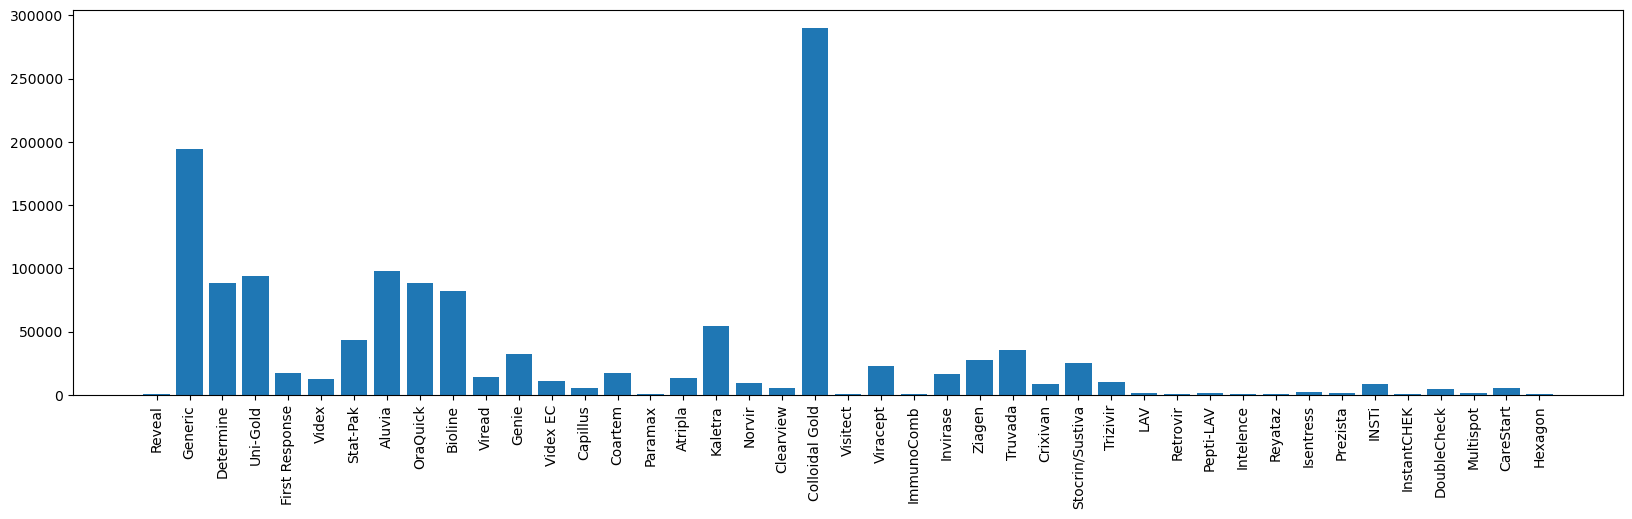

In [15]:
# Convert 'Freight Cost (USD)','Weight (Kilograms)' to numeric (float) data type
#data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
#data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')

# Remove rows with NaN values in 'Freight Cost (USD)','Weight (Kilograms)' (if any)
data.dropna(subset=['Freight Cost (USD)'], inplace=True)
data.dropna(subset=[ 'Weight (Kilograms)'], inplace=True)


plt.figure(figsize=(20,5))
plt.bar(data['Brand'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

In [16]:
data['Country'].value_counts()

Nigeria               763
Côte d'Ivoire         729
Uganda                564
Zambia                516
Vietnam               445
Tanzania              410
Haiti                 395
Mozambique            360
Rwanda                349
Zimbabwe              319
South Africa          282
Ethiopia              170
Guyana                155
Congo, DRC            104
Kenya                  91
Namibia                80
Botswana               62
South Sudan            59
Burundi                56
Cameroon               55
Ghana                  42
Sudan                  42
Dominican Republic     28
Swaziland              25
Malawi                 14
Mali                   12
Pakistan                8
Angola                  7
Benin                   7
Liberia                 6
Guatemala               5
Libya                   4
Sierra Leone            2
Lesotho                 2
Senegal                 2
Togo                    2
Afghanistan             2
Guinea                  1
Name: Countr

In [17]:
px.bar(data.groupby('Country')['Unit Price'].sum()/data.groupby('Country')['Unit Price'].count(),title='Ratio of Sum to Count of Unit Prices wrt Country')

The above graph is displaying the ratio of sum and count. The maximum ratio is of Mali i.e.6.915333 means the maximum shipping cost of unit price is done for Mali country with minimum no.of shipping times. Opposite to this, country Burkina Faso has the ratio 0.09 means maximum count of shipping but still cost of shipping is least

The country Mali is said to have maximum cost in export followed by Ethiopia,Botswana and Kazakhstan

If the ratio is more means the sum of export of unit price is more than the number of times the export has been done from particular country.

1
plt.figure(figsize=(20,5))

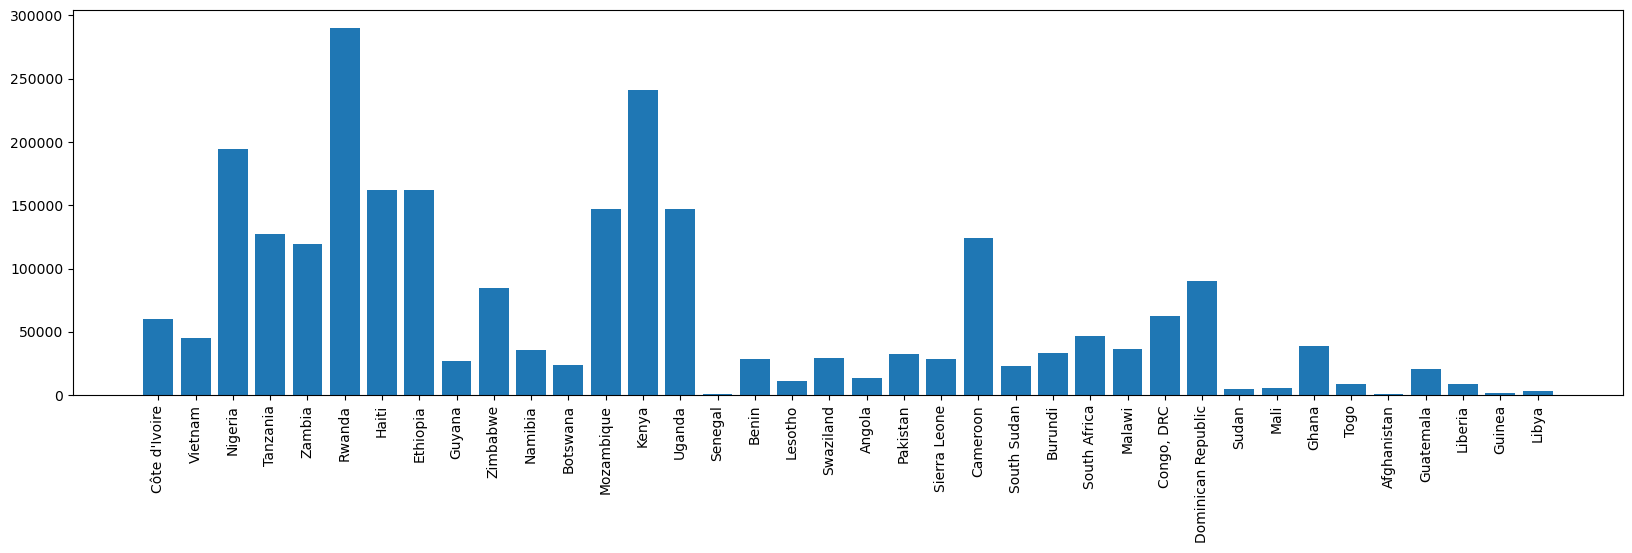

In [18]:
plt.figure(figsize=(20,5))
plt.bar(data['Country'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

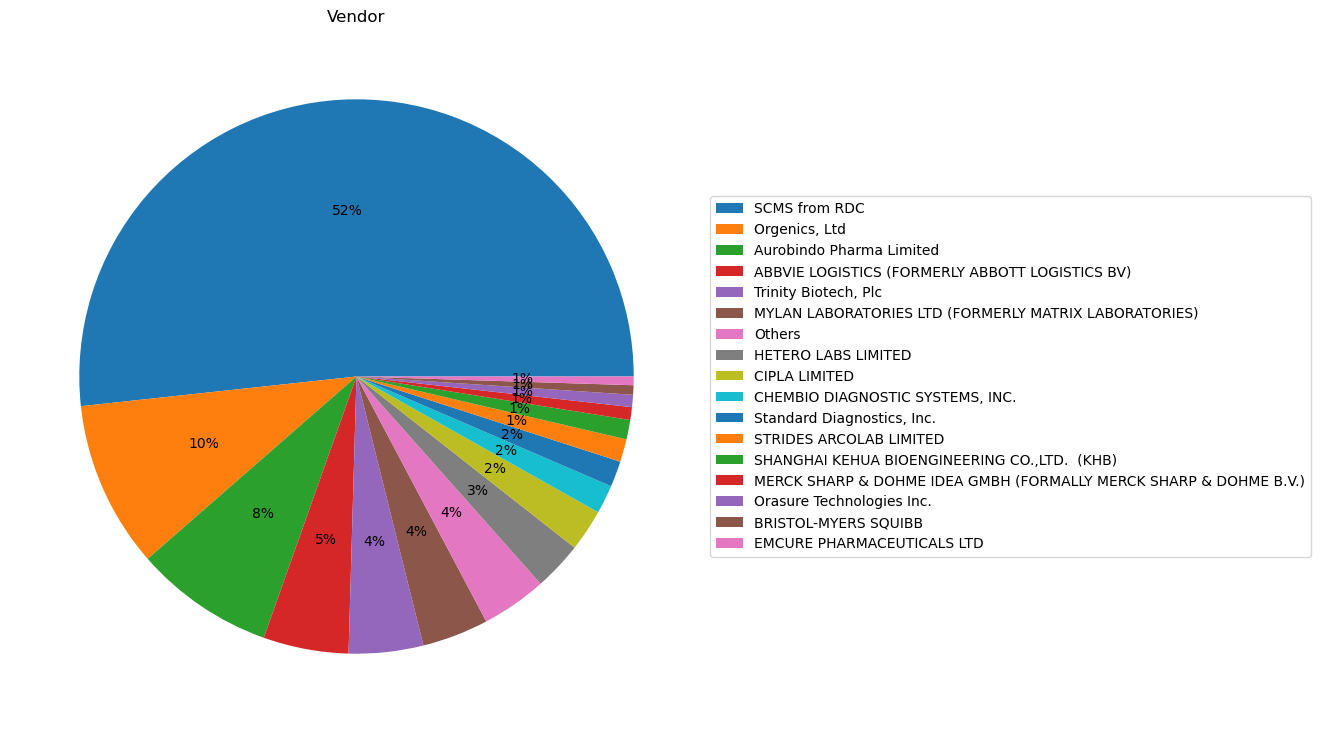

In [19]:
counts=data['Vendor'].value_counts()
idx=counts[counts.lt(30)].index
data.loc[data['Vendor'].isin(idx),'Vendor']='Others'
data['Vendor'].value_counts().plot.pie(label='',title='Vendor',legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

Above graph is displaying Aurobindo Pharma Limited has maximum count of shipping, and EMCURE PHARMACEUTICALS LTD has the least count of shipping the items.

In [20]:
# Convert 'Freight Cost (USD)','Weight (Kilograms)' to numeric (float) data type
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')

In [21]:
px.bar(data.groupby('Dosage Form')['Pack Price'].sum().sort_values(ascending=False),title='Sum of Pack Prices wrt Vendor',color_discrete_sequence=['black']*3)

Maximum Pack Price of Test Kit with 107.4132k cost is shipped followed by Tablet with 41.58742k cost. This implies may be that citizens prefer to go for test kit and tablet rather than any other form of dosage.

But this also means that may be test kits are more costly than any other form. It can be possible that supply of test kit is least but since may be test kit is costly thats why the bar of test kit is highest.

In [22]:
ShippingMode = data["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig=go.Figure(data=dat,layout=layout)
py.iplot(fig, filename="Shipment Mode")

Above graph is displaying Air shipment mode has maximum count of shipping, and Ocean shipment mode has the least count of shipping the items.

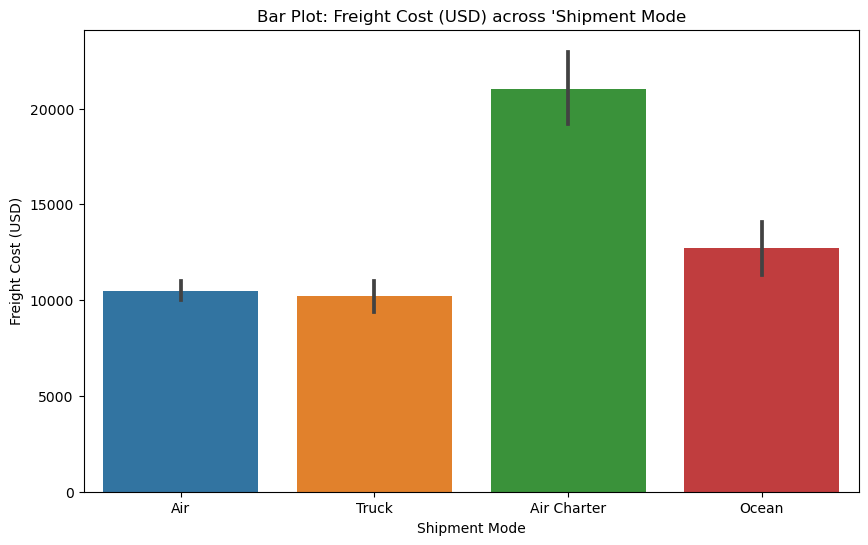

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipment Mode', y="Freight Cost (USD)", data=data)
plt.title("Bar Plot: Freight Cost (USD) across 'Shipment Mode")
plt.xlabel('Shipment Mode')
plt.ylabel("Freight Cost (USD)")
plt.show()

Although more shipment is done by air and less by ocean,but freight cost is more for air charter and ocean. So it seems that air charter and ocean are more costly compared to air and truck.

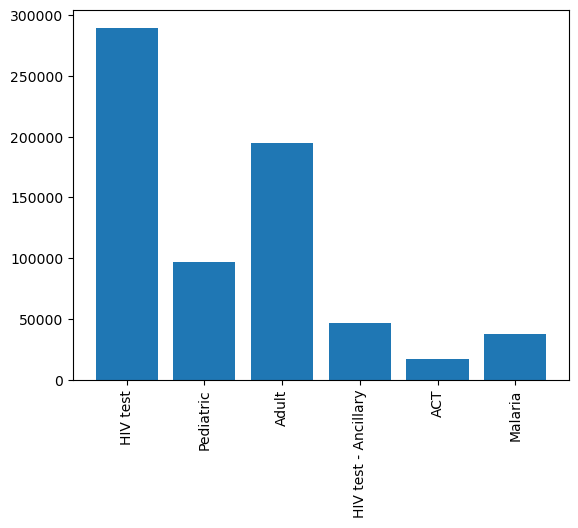

In [24]:
plt.bar(data['Sub Classification'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

The figure shows that HIV test sub classification has the maximum freight cost. That means either HIV test has maximum shipping cost or maximum no.of shipping item is HIV test kit.

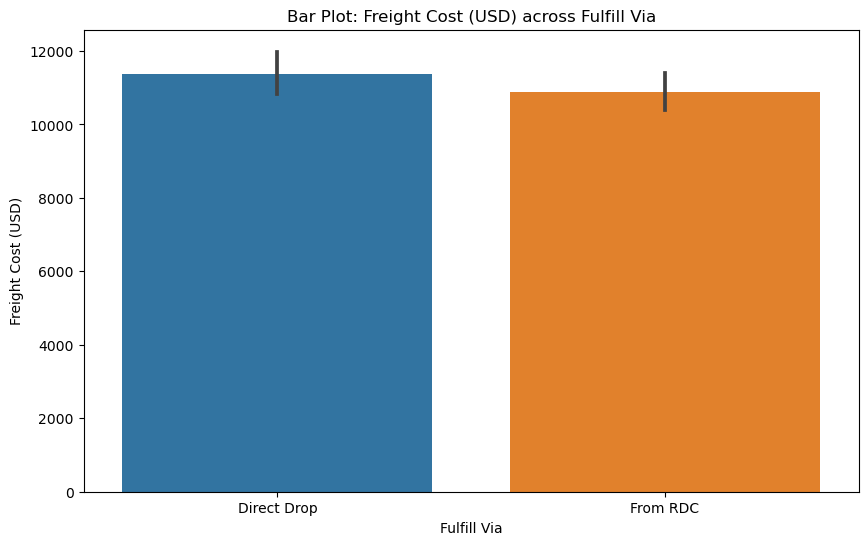

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Fulfill Via", y="Freight Cost (USD)", data=data)
plt.title("Bar Plot: Freight Cost (USD) across Fulfill Via")
plt.xlabel("Fulfill Via")
plt.ylabel("Freight Cost (USD)")
plt.show()

Freight cost is higher for direct drop deliveries

In [26]:
data['Vendor INCO Term'].value_counts()

N/A - From RDC    3193
EXW               2164
FCA                352
DDP                296
CIP                163
DAP                  3
CIF                  2
DDU                  2
Name: Vendor INCO Term, dtype: int64

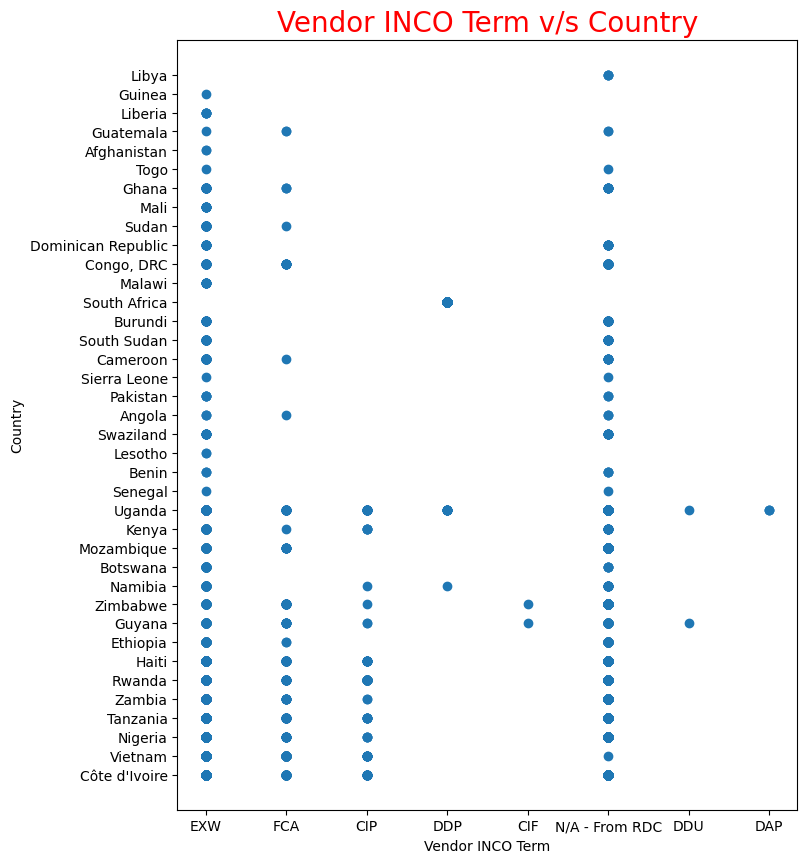

In [27]:
plt.figure(figsize=(8,10))
plt.scatter(data['Vendor INCO Term'],data['Country'])
plt.title('Vendor INCO Term v/s Country',size=20,color='r')
plt.xlabel('Vendor INCO Term')
plt.ylabel('Country')
plt.show()

Apart from rdc most of the deliveries are fulfilled by ddp and exw which belong to direct drop delivery.. but when we compare vendor inco term with countries ddp is only in three countries.. most countries have EXW and FCA

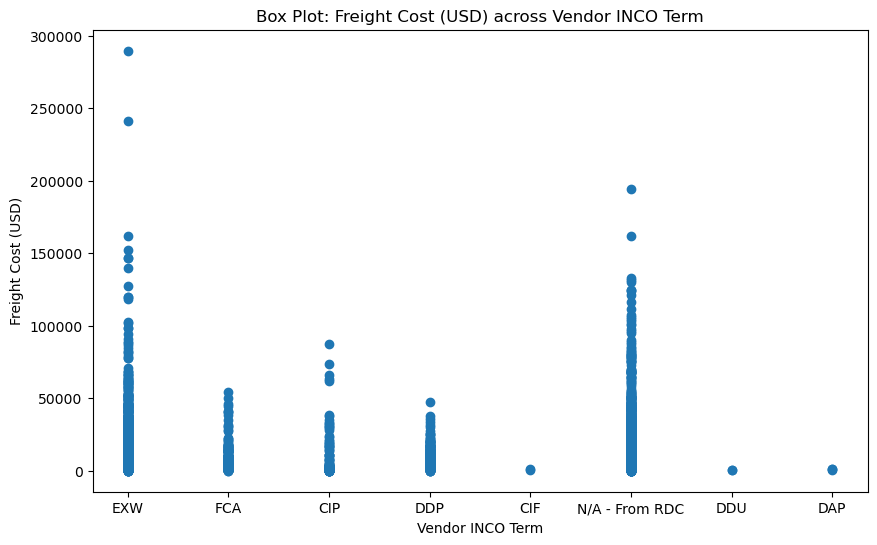

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Vendor INCO Term', y="Freight Cost (USD)", data=data)
plt.title("Box Plot: Freight Cost (USD) across Vendor INCO Term")
plt.xlabel('Vendor INCO Term')
plt.ylabel("Freight Cost (USD)")
plt.show()

Freight cost is higher for EXW and from RDC

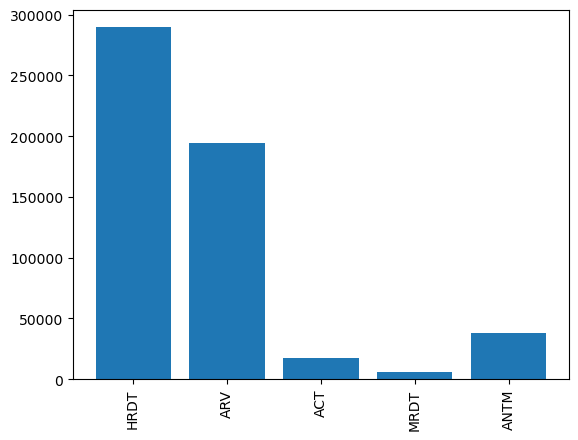

In [29]:
plt.bar(data['Product Group'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

Here the figure is showing that HRDT Product group has maximum shipping cost.

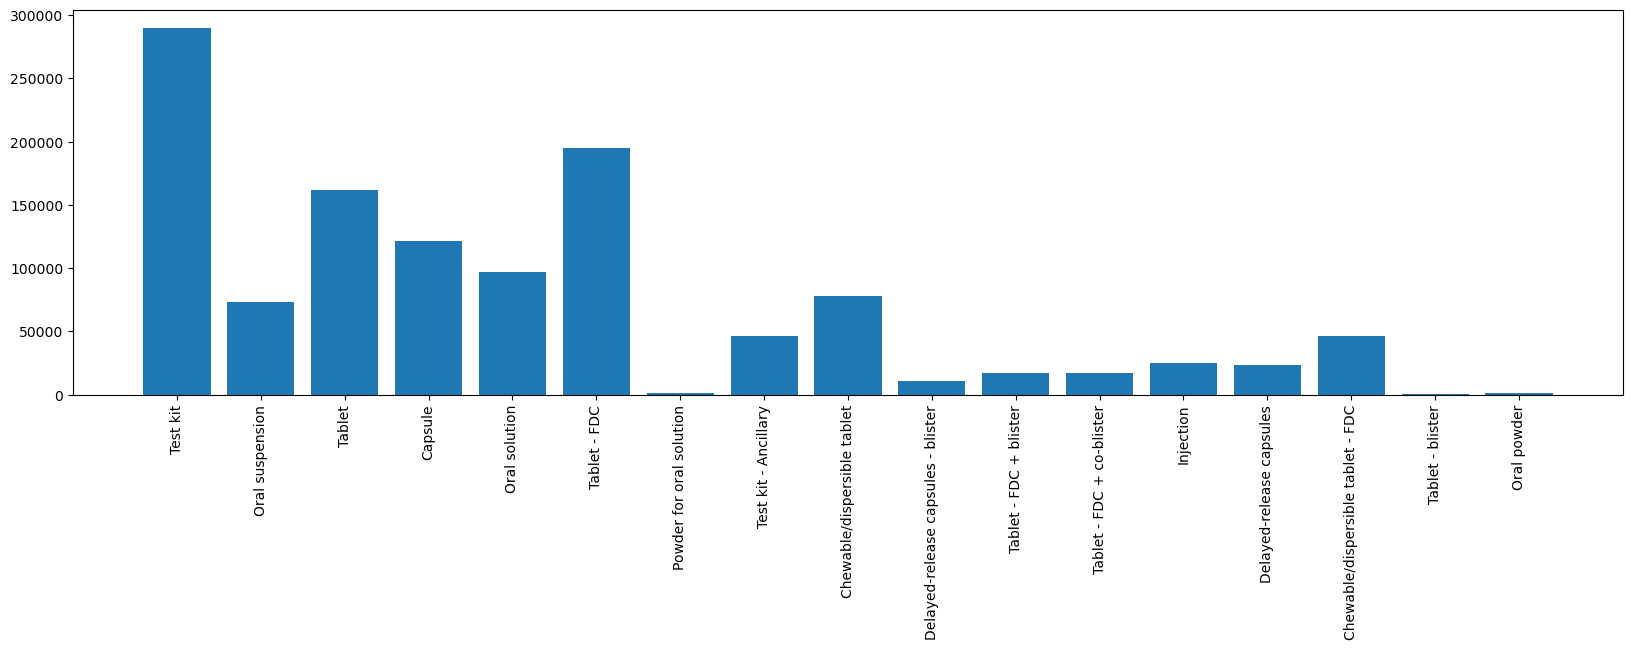

In [30]:
plt.figure(figsize=(20,5))
plt.bar(data['Dosage Form'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

Here shows that Test kit has more freight cost than other dosage forms.

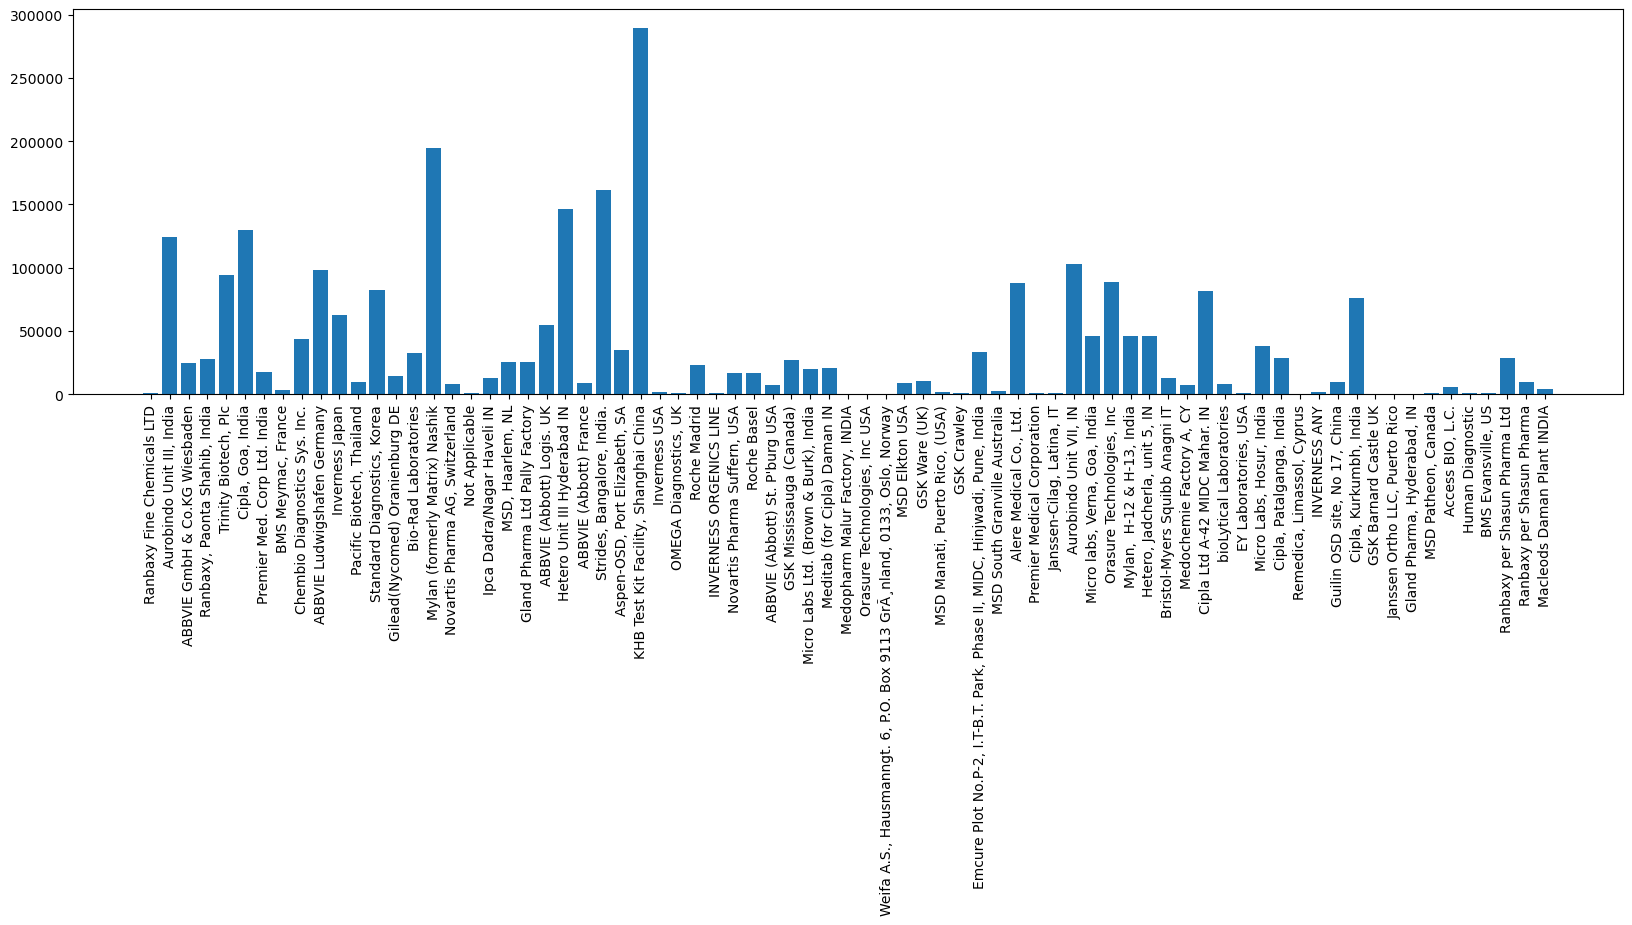

In [31]:
plt.figure(figsize=(20,5))
plt.bar(data['Manufacturing Site'],data['Freight Cost (USD)'])
plt.xticks(rotation=90)
plt.show()

Here shows that KHB Test kit Facility, Shanghai China has more freight cost, i.e it produces more no.of Test kits and test kit has high shipment cost therefore the bar of KHB test kit Facility is high.

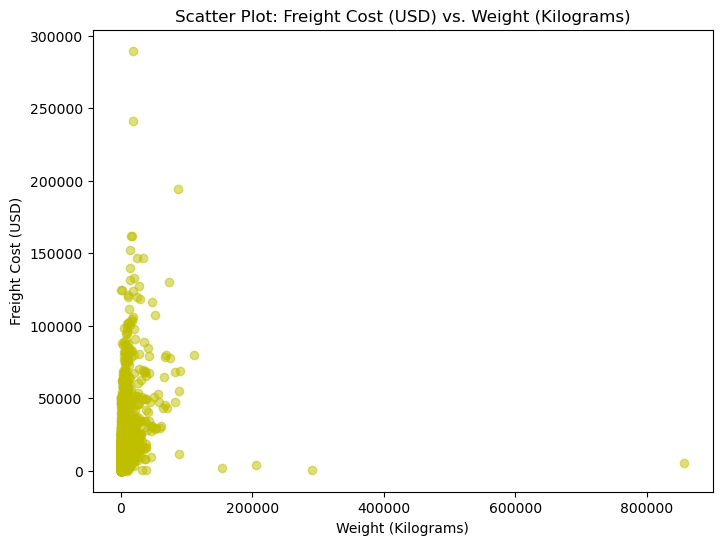

In [32]:
# FREIGHT COST OVER WEIGHT PLOT


# Scatter plot for 'Freight Cost (USD)' versus 'Weight (Kilograms)'
plt.figure(figsize=(8, 6))
plt.scatter(data['Weight (Kilograms)'], data['Freight Cost (USD)'], color='y', alpha=0.5)
plt.title("Scatter Plot: Freight Cost (USD) vs. Weight (Kilograms)")
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Freight Cost (USD)")
plt.show()

1.positive relationship it shows that a positive relationship between freight cost and weight. which means heavier shipment may cause higher transportation cost

2.Outliers some outliers are there, for certain weight values there are least as well as higher freight cost. It may due to specific shipment mode,country,unit price and so on.

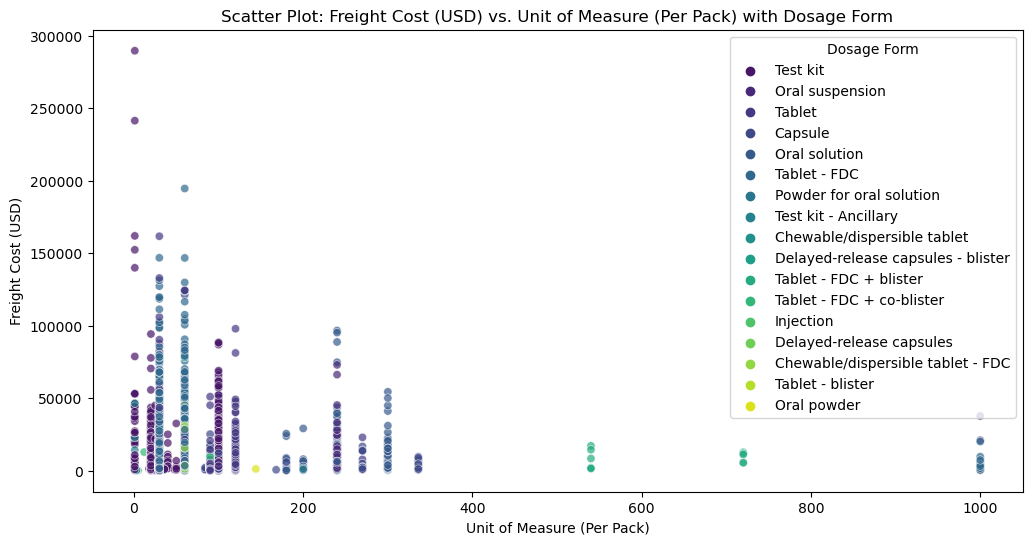

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Unit of Measure (Per Pack)', y='Freight Cost (USD)', hue='Dosage Form', palette='viridis', alpha=0.7)
plt.title("Scatter Plot: Freight Cost (USD) vs. Unit of Measure (Per Pack) with Dosage Form")
plt.xlabel("Unit of Measure (Per Pack)")
plt.ylabel("Freight Cost (USD)")
plt.legend(title='Dosage Form', loc='upper right')
plt.show()

1.Concentration of points
2.Outliers
3.There is no linear/non-linear relationships
4.freight cost variation

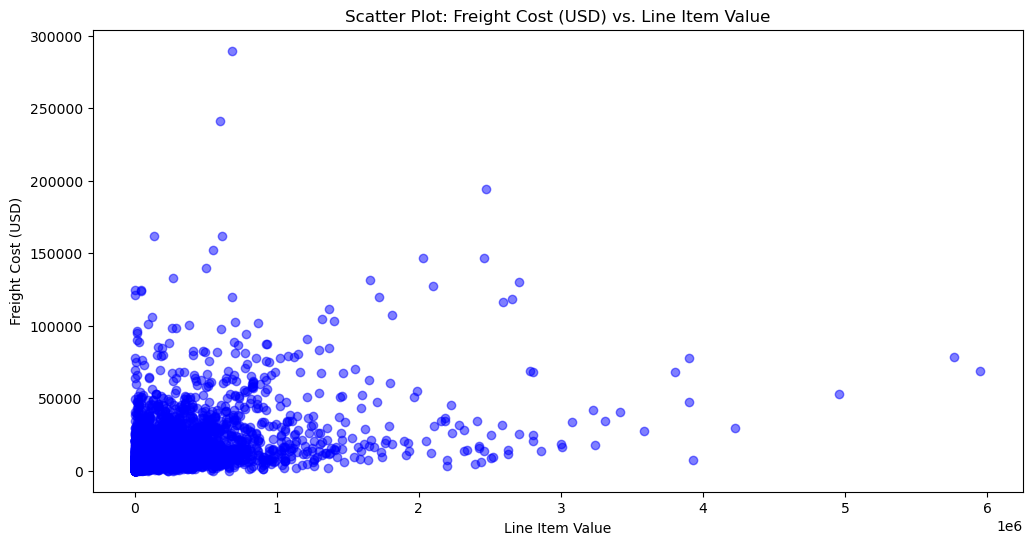

In [34]:
# Scatter plot for 'Freight Cost (USD)' versus 'Line Item Value'
plt.figure(figsize=(12, 6))
plt.scatter(data['Line Item Value'], data['Freight Cost (USD)'], color='b', alpha=0.5)
plt.title("Scatter Plot: Freight Cost (USD) vs. Line Item Value")
plt.xlabel("Line Item Value")
plt.ylabel("Freight Cost (USD)")
plt.show()

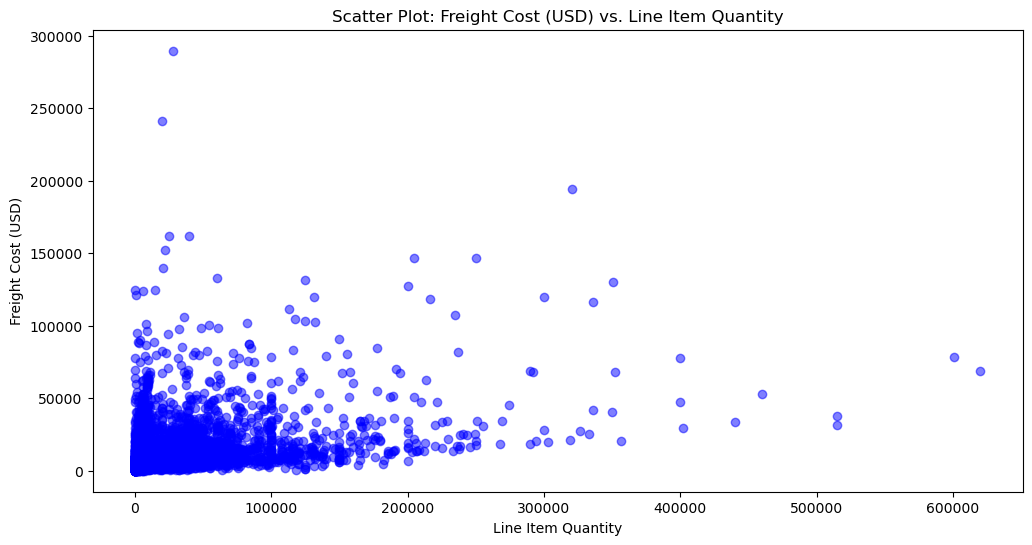

In [35]:
# Scatter plot for 'Freight Cost (USD)' versus 'Line Item Quantity'
plt.figure(figsize=(12, 6))
plt.scatter(data['Line Item Quantity'], data['Freight Cost (USD)'], color='b', alpha=0.5)
plt.title("Scatter Plot: Freight Cost (USD) vs. Line Item Quantity")
plt.xlabel("Line Item Quantity")
plt.ylabel("Freight Cost (USD)")
plt.show()

Line item quantity*Pack price = Line item value
1.There is positive correlation between line item quantity and freight cost
2.certain line item quantities may have similar freight cost.
3.Outliers are there

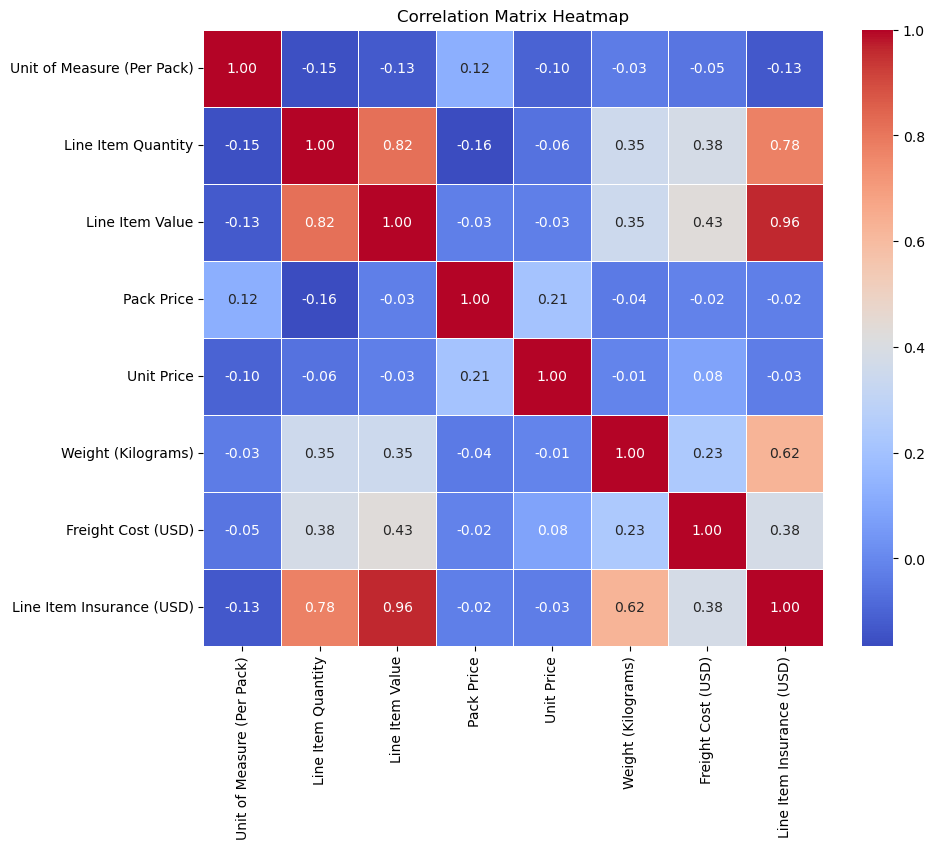

In [36]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There is no direct positive/negative correlation affecting the target colum(freight cost)
There is a very strong positive correlation between line item value and line item insurance
There is a strong positive correlation between line item quantity and line item value and between line item quantity and line item insurance

# Data preprocessing

In [37]:
# Convert 'Freight Cost (USD)','Weight (Kilograms)' to numeric (float) data type
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')

# Missing value handling

In [38]:
data.isna().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    211
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1368
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [39]:
#filling the missing values in the columns with median value

for col in ['Line Item Insurance (USD)']:
    data[col]=data[col].fillna(data[col].median())
    
data['Shipment Mode'].fillna(data['Shipment Mode'].mode()[0], inplace=True)
data['Weight (Kilograms)'].fillna(data['Weight (Kilograms)'].mode()[0], inplace=True)

data['Dosage'].fillna('Unknown', inplace=True)


    

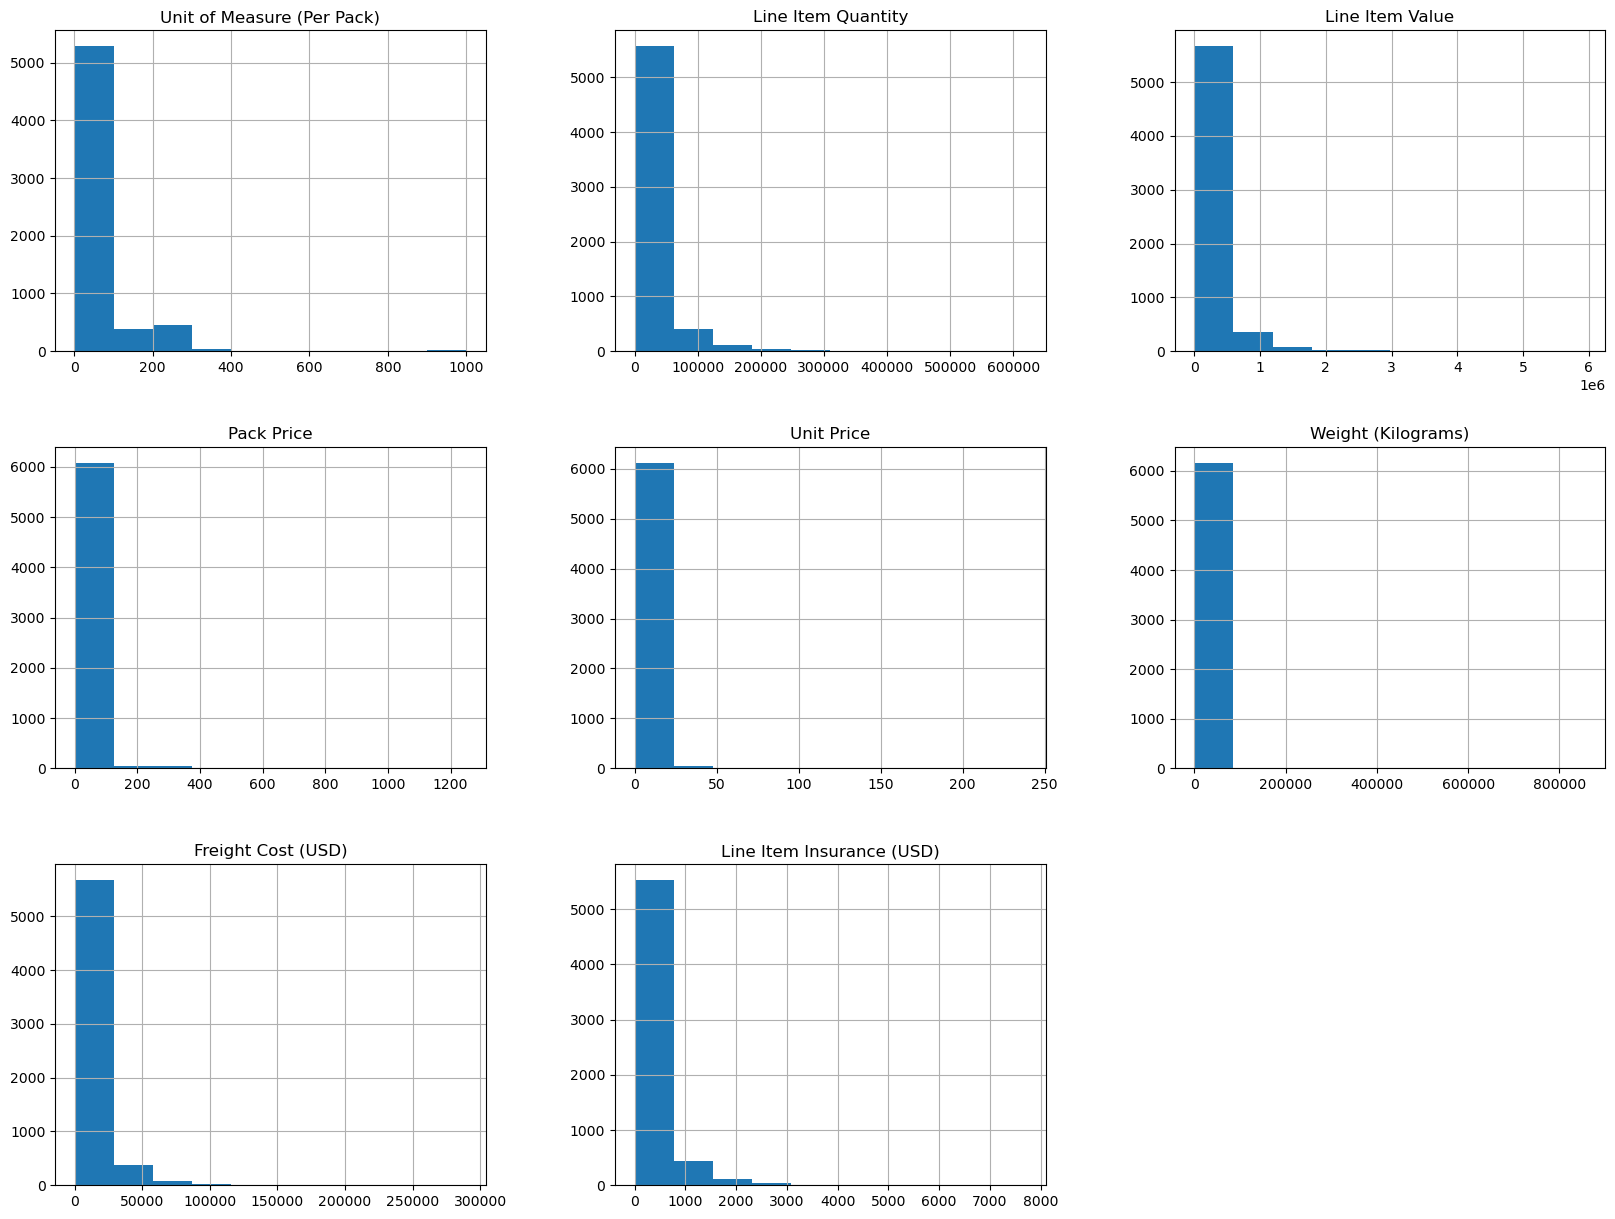

In [40]:
#plot graphs for float and int data types

fregraph = data.select_dtypes(include=['float','int'])
fregraph.hist(figsize=(20,15))
plt.show()

In [41]:
data.isna().sum()

Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

# Feature engineering

In [42]:
date_columns = [ 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Calculate the variance between scheduled and actual delivery dates and add it as a new column
data['Delivery Variance'] = data['Scheduled Delivery Date'] - data['Delivered to Client Date']

# Identify early or delayed deliveries
data['Delivery Status'] = data['Delivery Variance'].apply(lambda x: 'Early' if x.days < 0 else 'On Time' if x.days == 0 else 'Delayed')


# Feature reduction

In [43]:
col=['Project Code','PQ #','PO / SO #','ASN/DN #','PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date','Product Group','Item Description','Molecule/Test Type','Dosage','Unit of Measure (Per Pack)','Line Item Quantity','Pack Price','Unit Price','Manufacturing Site','Delivery Variance']
data1=data.drop(col,axis=1)

In [44]:
data.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery Variance', 'Delivery Status'],
      dtype='object')

In [45]:
data1.shape

(6175, 15)

In [46]:
Other_threshold = 10

# Calculate the occurrence frequency of each variable
category_counts = data['Country'].value_counts()

# Identify rarely occurring variables
Other_categories = category_counts[category_counts <= Other_threshold].index

# Group the rarely occurring variables into a new category 'Other'
data['Country'] = data['Country'].apply(lambda x: 'Rare' if x in Other_categories else x)

# Get the value counts after the grouping
value_counts = data['Country'].value_counts()

# Display the value counts, including the count of 'Other' category
print(value_counts)

# Display the count of rare occurrences
Other_count = value_counts['Other'] if 'Other' in value_counts.index else 0
print("Other Count:", Other_count)

Nigeria               763
Côte d'Ivoire         729
Uganda                564
Zambia                516
Vietnam               445
Tanzania              410
Haiti                 395
Mozambique            360
Rwanda                349
Zimbabwe              319
South Africa          282
Ethiopia              170
Guyana                155
Congo, DRC            104
Kenya                  91
Namibia                80
Botswana               62
South Sudan            59
Burundi                56
Cameroon               55
Rare                   48
Sudan                  42
Ghana                  42
Dominican Republic     28
Swaziland              25
Malawi                 14
Mali                   12
Name: Country, dtype: int64
Other Count: 0


In [47]:
Other_threshold = 10

# Calculate the occurrence frequency of each variable
category_counts = data['Vendor'].value_counts()

# Identify rarely occurring variables
Other_categories = category_counts[category_counts <= Other_threshold].index

# Group the rarely occurring variables into a new category 'Other'
data['Vendor'] = data['Vendor'].apply(lambda x: 'Other' if x in Other_categories else x)

# Get the value counts after the grouping
value_counts = data['Vendor'].value_counts()

# Display the value counts, including the count of 'Other' category
print(value_counts)

# Display the count of rare occurrences
Other_count = value_counts['Other'] if 'Other' in value_counts.index else 0
print("Other Count:", Other_count)

SCMS from RDC                                                        3193
Orgenics, Ltd                                                         600
Aurobindo Pharma Limited                                              503
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                       307
Trinity Biotech, Plc                                                  268
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                 239
Others                                                                235
HETERO LABS LIMITED                                                   176
CIPLA LIMITED                                                         151
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                      103
Standard Diagnostics, Inc.                                             93
STRIDES ARCOLAB LIMITED                                                82
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)                          70
MERCK SHARP & DOHME IDEA GMBH (FORMALL

In [48]:
Other_threshold = 10

# Calculate the occurrence frequency of each variable
category_counts = data['Dosage'].value_counts()

# Identify rarely occurring variables
Other_categories = category_counts[category_counts <= Other_threshold].index

# Group the rarely occurring variables into a new category 'Other'
data['Dosage'] = data['Dosage'].apply(lambda x: 'Other' if x in Other_categories else x)

# Get the value counts after the grouping
value_counts = data['Dosage'].value_counts()

# Display the value counts, including the count of 'Other' category
print(value_counts)

# Display the count of rare occurrences
rare_count = value_counts['Other'] if 'Other' in value_counts.index else 0
print("Other Count:", Other_count)

Unknown          1368
300mg             512
200mg             485
600mg             419
150/300/200mg     360
150/300mg         332
10mg/ml           273
200/50mg          264
150mg             229
300/300mg         205
600/300/300mg     187
150/200/30mg      155
100mg             131
600/200/300mg     102
80/20mg/ml         92
30/50/60mg         85
200/300mg          84
50mg               80
20mg/ml            74
150/30mg           71
30mg               69
300/200mg          64
100/25mg           62
Other              58
30/60mg            55
400mg              52
60/30mg            44
600/300mg          44
300/100mg          41
250mg              37
30mg/ml            26
25mg               21
15mg               17
300/150/300mg      16
1mg/ml             15
30/50/6mg          12
500/25mg           12
20/120mg           11
30/6mg             11
Name: Dosage, dtype: int64
Other Count: 0


In [49]:
Other_threshold = 10

# Calculate the occurrence frequency of each variable
category_counts = data['Brand'].value_counts()

# Identify rarely occurring variables
Other_categories = category_counts[category_counts <= Other_threshold].index

# Group the rarely occurring variables into a new category 'Other'
data['Brand'] = data['Brand'].apply(lambda x: 'Rare' if x in Other_categories else x)

# Get the value counts after the grouping
value_counts = data['Brand'].value_counts()

# Display the value counts, including the count of 'Other' category
print(value_counts)

# Display the count of rare occurrences
rare_count = value_counts['Other'] if 'Other' in value_counts.index else 0
print("Other Count:", Other_count)

Generic            4161
Determine           636
Uni-Gold            281
Aluvia              179
Stat-Pak            107
Bioline             101
Kaletra              93
Norvir               82
Colloidal Gold       70
Truvada              64
Rare                 58
OraQuick             46
Videx                35
Stocrin/Sustiva      33
Genie                28
Capillus             26
Invirase             22
Viread               22
Crixivan             21
Prezista             19
Clearview            17
Ziagen               13
First Response       13
Intelence            13
Videx EC             12
Isentress            12
Coartem              11
Name: Brand, dtype: int64
Other Count: 0


# Encoding

In [50]:
data1.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Sub Classification', 'Vendor', 'Brand', 'Dosage Form',
       'Line Item Value', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)', 'Delivery Status'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Sub Classification', 'Vendor', 'Brand', 'Dosage Form','First Line Designation','Delivery Status']
label_encoders = {}  # To store encoders for each column

for col in label_cols:
    le = LabelEncoder()
    encoded = le.fit_transform(data1[col])
    data1[col] = encoded
    label_encoders[col] = le

# Scaling

In [52]:
from sklearn.preprocessing import RobustScaler

# List of numerical columns to be scaled
cols_to_scale = ['Line Item Value', 'Weight (Kilograms)','Line Item Insurance (USD)']
robust_scaling = {}  # To store scaling for each column

for col in cols_to_scale:
    rs = RobustScaler()
    scaled_values = rs.fit_transform(data1[[col]])  # Notice the change here, using rs.fit_transform
    data1[col] = scaled_values
    robust_scaling[col] = rs

In [53]:
# Assuming "Freight Cost" column is in X
# Extract features (X) and target labels (y)
X = data1.drop(['Freight Cost (USD)'], axis=1)  # Drop the "Freight Cost" column from features
y = data1['Freight Cost (USD)']

# Check which rows have non-missing "Freight Cost" values
has_freight_cost = ~np.isnan(y)

In [54]:
# Separate the data into training and testing sets based on the availability of "Freight Cost" values
X_train = X[has_freight_cost]
X_test = X[~has_freight_cost]
y_train = y[has_freight_cost]

In [55]:
from sklearn.impute import SimpleImputer

# Impute missing values in the target variable for the training set
imputer = SimpleImputer(strategy='median')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Model creation

# #Ridge regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already split your data into features (X) and target (y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Handle missing values in y_test
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_test_imputed = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # You can add more values to the list
ridge_model = Ridge()
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2')
random_search.fit(X_train, y_train_imputed)

best_alpha = random_search.best_params_['alpha']

# Create and train the Ridge regression model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train_imputed)

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculate R-squared (R2) score for Ridge regression
r2_ridge = r2_score(y_test_imputed, y_pred_ridge)

print("Best Ridge R-Squared =", r2_ridge)


Best Ridge R-Squared = 0.22908047354144045


# #Random forest regression

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already split your data into features (X) and target (y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Handle missing values in y_test
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_test_imputed = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Hyperparameter tuning using RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(random_forest_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2')
random_search_rf.fit(X_train, y_train_imputed)

best_rf_model = random_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate R-squared (R2) score for Random Forest
r2_rf = r2_score(y_test_imputed, y_pred_rf)

print("Best Random Forest R-Squared =", r2_rf)

Best Random Forest R-Squared = 0.5814294307752146


# #Gradient boosting regression

In [58]:
# Assign feature names to the model
feature_names = ['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'Sub Classification', 'Vendor', 'Brand', 'Dosage Form',
       'Line Item Value', 'First Line Designation', 'Weight (Kilograms)','Line Item Insurance (USD)', 'Delivery Status']

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already split your data into features (X) and target (y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Handle missing values in y_test
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_test_imputed = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb_reg, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gb.fit(X_train, y_train_imputed)

best_gb_model = random_search_gb.best_estimator_

# Make predictions on the test set
X_test = X_test[X_train.columns]
y_pred_gb = best_gb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-Squared (R2) error for the test set
MSE_gb = mean_squared_error(y_test_imputed, y_pred_gb)
R2_gb = r2_score(y_test_imputed, y_pred_gb)

# Print MSE and R-Squared error
print('Best GB Regressor MSE =', MSE_gb)
print('Best GB Regressor R-Squared =', R2_gb)

Best GB Regressor MSE = 109064918.56057656
Best GB Regressor R-Squared = 0.626803711394439


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already split your data into features (X) and target (y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in y_train
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_train_imputed = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Handle missing values in y_test
# Replace NaN values with a suitable imputed value (e.g., mean or median)
y_test_imputed = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
random_search_gb = RandomizedSearchCV(gb_reg, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_gb.fit(X_train, y_train_imputed)

best_gb_model = random_search_gb.best_estimator_

# Cross-validation predictions
y_cv_pred = cross_val_predict(best_gb_model, X_train, y_train_imputed, cv=5)

# Reorder the columns in X_test to match the order in X_train
X_test_reordered = X_test[X_train.columns]

# Make predictions using the model
y_pred_gb = best_gb_model.predict(X_test_reordered)

# Calculate Mean Squared Error (MSE) and R-Squared (R2) error for the test set
MSE_gb = mean_squared_error(y_test_imputed, y_pred_gb)
R2_gb = r2_score(y_test_imputed, y_pred_gb)

# Print cross-validated MSE and R-Squared
cv_MSE_gb = mean_squared_error(y_train_imputed, y_cv_pred)
cv_R2_gb = r2_score(y_train_imputed, y_cv_pred)
print('Cross-validated GB Regressor MSE =', cv_MSE_gb)
print('Cross-validated GB Regressor R-Squared =', cv_R2_gb)

# Print MSE and R-Squared error
print('Best GB Regressor MSE =', MSE_gb)
print('Best GB Regressor R-Squared =', R2_gb)


Cross-validated GB Regressor MSE = 88472890.95991218
Cross-validated GB Regressor R-Squared = 0.6315635568823585
Best GB Regressor MSE = 109064918.56057656
Best GB Regressor R-Squared = 0.626803711394439


In [61]:
best_gb_model.feature_names = feature_names

In [62]:
import pickle

# Save the trained model and encoders using pickle

In [63]:
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump((label_encoders), file)



In [64]:
with open('robust_scaling.pkl', 'wb') as file:
    pickle.dump(robust_scaling, file)

In [65]:
# Save the trained model and encoders using pickle
with open('Gradient_booster.pkl', 'wb') as file:
    pickle.dump(best_gb_model, file)